In [3]:
import pandas as pd
import matplotlib.pyplot as plt

statewide_2020 = pd.read_csv('20201103EarlyAbsentee.csv')
statewide_2024 = pd.read_excel('20241105EarlyAbsentee1023.xlsx')
statewide_2016 = pd.read_csv('shelby_2016.csv')

shelby_2016 = statewide_2016.loc[statewide_2016['County'] == 'Shelby']
shelby_2016['Day'] = list(range(len(shelby_2016)))

shelby_2020 = statewide_2020.loc[statewide_2020['County'] == 'Shelby']
shelby_2020 = shelby_2020.reset_index()
shelby_2020['Day'] = list(range(len(shelby_2020)))

shelby_2024 = statewide_2024.loc[statewide_2024['County'] == 'Shelby']
shelby_2024 = shelby_2024.reset_index()
shelby_2024['Day'] = list(range(len(shelby_2024)))





/tmp/ipykernel_23444/320154204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelby_2016['Day'] = list(range(len(shelby_2016)))


Text(0.5, 1.0, 'Shelby County, TN Absentee 2020/2024 Comparison')

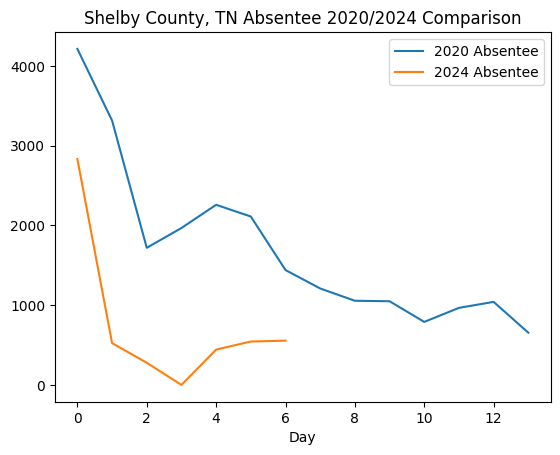

In [4]:

ax = plt.gca()
shelby_2020.plot(x="Day", y="Absentee", label="2020 Absentee", ax= ax )
shelby_2024.plot(x="Day", y="Absentee", label="2024 Absentee", ax=ax)
plt.title("Shelby County, TN Absentee 2020/2024 Comparison")
#plt.show()

Text(0.5, 1.0, 'Shelby County, TN Early Voting 2020/2024 Comparison')

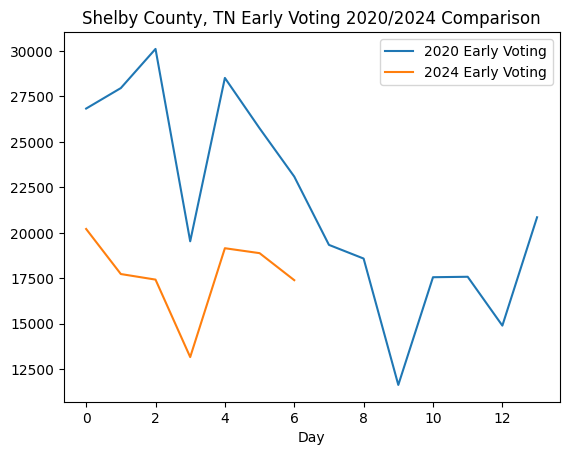

In [5]:
ax = plt.gca()
shelby_2020.plot(x="Day", y="EarlyVoting", label="2020 Early Voting", ax= ax )
shelby_2024.plot(x="Day", y="EarlyVoting", label="2024 Early Voting", ax=ax)
plt.title("Shelby County, TN Early Voting 2020/2024 Comparison")

Text(0.5, 1.0, 'Shelby County, TN Early/Absentee Combined 2020/2024 Comparison')

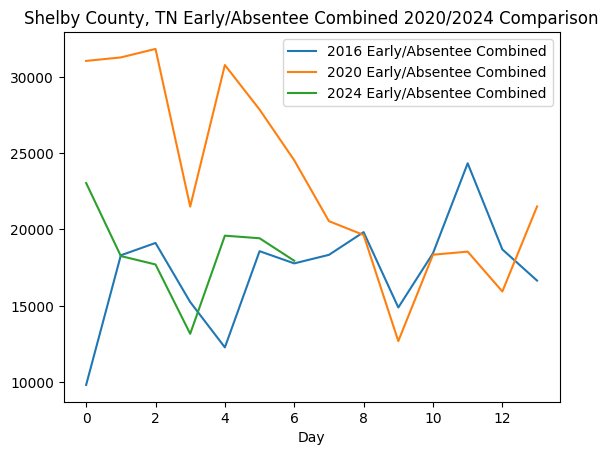

In [6]:
ax = plt.gca()
shelby_2016.plot(x="Day", y="EarlyTotal", label="2016 Early/Absentee Combined", ax=ax)
shelby_2020.plot(x="Day", y="Day Total", label="2020 Early/Absentee Combined", ax=ax)
shelby_2024.plot(x="Day", y="Day Total", label="2024 Early/Absentee Combined", ax=ax)
plt.title("Shelby County, TN Early/Absentee Combined 2020/2024 Comparison")